<a href="https://colab.research.google.com/github/mizykk/Kaggle/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 준비

디렉토리 지정하기

In [1]:
cd drive/'My Drive'/Study/Kaggle/Titanic

/content/drive/My Drive/Study/Kaggle/Titanic


케글에서 데이터 가져오기

In [2]:
# !cp -r drive/'My Drive'/Study/Kaggle /root/.kaggle/   # kaggl.json위치 지정
# !chmod 600 /root/.kaggle/kaggle.json

In [3]:
# !kaggle competitions download -c titanic

# Titanic

Import Library

In [4]:
import re
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

데이터 불러오기

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA 데이터 탐색하기

|Variable|Definition|Key|
|:---:|:---:|:---:|
|Survived|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Name|Name||
|Sex|Sex||
|Age|Age in years||
|SibSp|# of siblings / spouses aboard the Titanic||
|Parch|# of parents / children aboard the Titanic||
|Ticket|Ticket number||
|Fare|Passenger fare||	
|Cabin|Cabin number||	
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

In [6]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S


In [7]:
# 열 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# 기초 통계
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Abbott, Mr. Rossmore Edward",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- 인물정보 : Name / Sex / Age  
- 가족정보 : SibSp / Parch  
- 탑승정보 : Pclass / Ticket / Fare / Cabin / Embarked


**결측값 확인하기**

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

→ Age, Cabin, Embarked에 결측값 존재   
→ Cabin은 데이터의 대부분이 결측값이므로 열을 삭제한다.

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

→ Age, Fare, Cabin에 결측값 존재

**Q. 얼마나 살아남았는지**

In [11]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

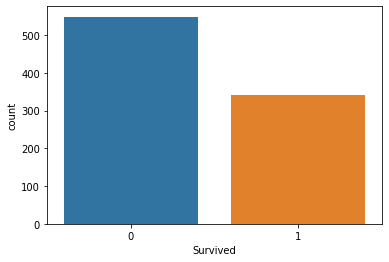

In [12]:
sns.countplot(x = 'Survived', data = train)

### 인물정보
- Name
- Sex
- Age

#### 1. Name

[ NameTitle ]  
이름 가운데에 Mr. Mrs. 등의 호칭이 있다. 이 호칭을 추출하여 살펴보고, 변수를 생성한다.  


In [13]:
com = re.compile('(?<= )\w+\.')
train['NameTitle'] = train['Name'].apply(lambda x: com.findall(x)[0])

test['NameTitle'] = test['Name'].apply(lambda x: com.findall(x)[0])

In [14]:
train['NameTitle'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
Capt.          1
Countess.      1
Don.           1
Ms.            1
Mme.           1
Lady.          1
Jonkheer.      1
Sir.           1
Name: NameTitle, dtype: int64

In [15]:
test['NameTitle'].value_counts()

Mr.        240
Miss.       78
Mrs.        72
Master.     21
Col.         2
Rev.         2
Dr.          1
Ms.          1
Dona.        1
Name: NameTitle, dtype: int64

→ 비슷한 것끼리 묶는다.

In [16]:
train['NameTitle'].replace(['Capt.','Don.','Dona.','Jonkheer.','Lady.','Major.','Mlle.','Mme.', 'Ms.','Sir.','Countess.'],
                           ['Mr.','Mr.','Mrs.','Mr.','Mrs.','Mr.','Miss.','Mrs.','Miss.','Mr.','Mrs.'],inplace=True)
test['NameTitle'].replace(['Capt.','Don.','Dona.','Jonkheer.','Lady.','Major.','Mlle.','Mme.', 'Ms.', 'Sir.','Countess.'],
                           ['Mr.','Mr.','Mrs.','Mr.','Mrs.','Mr.','Miss.','Mrs.','Miss.','Mr.','Mrs.'],inplace=True)

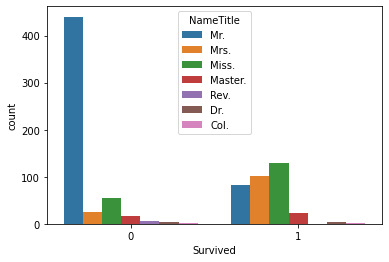

In [17]:
sns.countplot(x = 'Survived', data = train, hue = 'NameTitle')

→ NameTitle별 Survived에 차이가 보임

#### 2. Sex

In [18]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

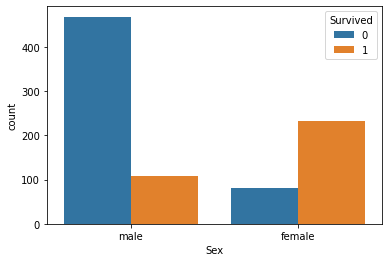

In [19]:
sns.countplot(x = 'Sex', data = train, hue = 'Survived')

→ 여성은 대체로 살아남고(Survived 1), 남성은 대체로 사망함(Survived 0)

#### 3. Age

**결측값 채우기**
- 전체 나이의 평균보다는 NameTitle의 평균으로 결측값을 채운다.

In [20]:
# Age가 결측값인 것들의 NameTitle 확인
train[train['Age'].isnull()]['NameTitle'].value_counts()

Mr.        119
Miss.       36
Mrs.        17
Master.      4
Dr.          1
Name: NameTitle, dtype: int64

In [21]:
# NameTitle별 Age의 평균
train.groupby(['NameTitle'], as_index=False)['Age'].mean()

,NameTitle,Age
0,Col.,58.000000
1,Dr.,42.000000
2,Master.,4.574167
3,Miss.,21.845638
4,Mr.,32.615099
5,Mrs.,35.873874
6,Rev.,43.166667


In [22]:
# Train 데이터의 Age 결측값 채우기
train['Age'][(train['Age'].isnull())&(train['NameTitle']=='Mr.')] = 33
train['Age'][(train['Age'].isnull())&(train['NameTitle']=='Miss.')] = 22
train['Age'][(train['Age'].isnull())&(train['NameTitle']=='Mrs.')] = 36
train['Age'][(train['Age'].isnull())&(train['NameTitle']=='Master.')] = 5
train['Age'][(train['Age'].isnull())&(train['NameTitle']=='Dr.')] = 42

In [23]:
# Test 데이터의 Age 결측값 채우기
train['Age'][(train['Age'].isnull())&(train['NameTitle']=='Mr.')] = 33
train['Age'][(train['Age'].isnull())&(train['NameTitle']=='Miss.')] = 22
train['Age'][(train['Age'].isnull())&(train['NameTitle']=='Mrs.')] = 36
train['Age'][(train['Age'].isnull())&(train['NameTitle']=='Master.')] = 5

**그래프 그려 데이터 파악하기**

In [24]:
sa = pd.merge(train[train['Survived']==0].groupby(['Age'], as_index = False)['Survived'].count(),
              train[train['Survived']==1].groupby(['Age'], as_index = False)['Survived'].count(), on = 'Age', how = 'outer')
sa.columns = ['Age', 'Survived_0', 'Survived_1']
sa.sort_values(['Age'], inplace = True)
sa = sa.fillna(0)

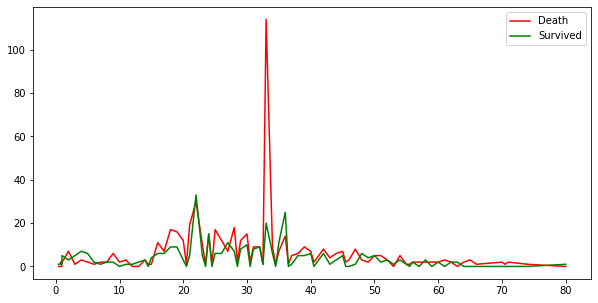

In [25]:
plt.figure(figsize = (10, 5))
plt.plot(sa['Age'], sa['Survived_0'], color = 'r', label = 'Death')
plt.plot(sa['Age'], sa['Survived_1'], color = 'g', label = 'Survived')
plt.legend()

→ 연령대별로 그룹을 나눈다.
- 0 ~ 5 : 아기
- 5 ~ 15 : 어린이  
- 16 ~ 25 : 청소년  
- 26 ~ 35 : 성년  
- 36 ~ 50 : 중년  
- 50 ~ : 노인  

In [26]:
def age_dist(age):
  if age < 5 :
    ag = 0
  elif age < 16 :
    ag = 1
  elif age < 26 :
    ag = 2
  elif age < 36 : 
    ag = 3
  elif age < 50 : 
    ag = 4
  else:
    ag = 5
  return ag

train['Age_Dist'] = train['Age'].apply(lambda x: age_dist(x))

test['Age_Dist'] = test['Age'].apply(lambda x: age_dist(x))

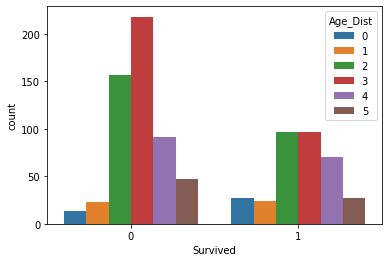

In [27]:
sns.countplot(x = 'Survived', data = train, hue = 'Age_Dist')

#### 가족정보
- Sibsp
- Parch

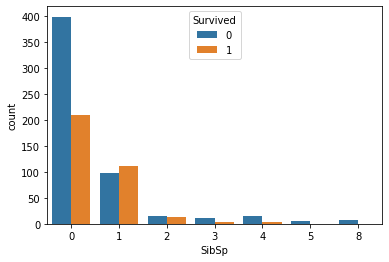

In [28]:
sns.countplot(x = 'SibSp', data = train, hue = 'Survived')

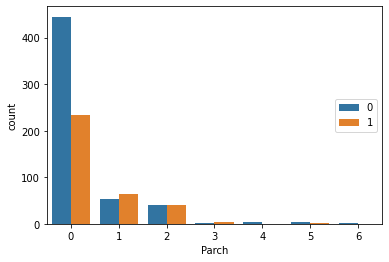

In [29]:
sns.countplot(x = 'Parch', data = train, hue = 'Survived')
plt.legend(loc = 5)

→ 0일 때 Survived가 대체로 0이다.  
→ 크게 차이가 나는 것 같지는 않다.

[ 가족의 수를 나타내는 변수 생성 ] 

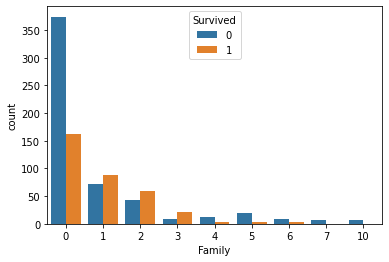

In [30]:
train['Family'] = train['SibSp'] + train['Parch']
test['Family'] = test['SibSp'] + test['Parch']

sns.countplot(x = 'Family', data = train, hue = 'Survived')

→ 4 이상은 4로 통합

In [31]:
train['Family'] = np.where(train['Family']>3, 4, train['Family'])
test['Family'] = np.where(test['Family']>3, 4, test['Family'])

### 탑승정보 
- Pclass 
- Ticket 
- Fare 
- Cabin 
- Embarked

#### 1. Pclass

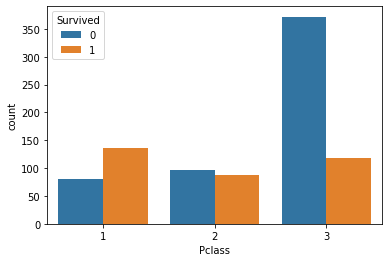

In [32]:
sns.countplot(x = 'Pclass', data = train, hue = 'Survived')

→ 1등급이 많이 살아남음. 의외로 2등급은 그렇게 살아남지 못함

#### 2. Ticket

In [33]:
train['Ticket'].sample(3)

496                36947
804               347089
636    STON/O 2. 3101292
Name: Ticket, dtype: object

In [34]:
def word_from_ticket(t):
  if '.' in t:
    com = re.compile('.+\.')
    word = com.findall(t)[0]
  elif t.isdigit():
    word = ''
  else:
    word = t.split(' ')[0]
  word = word.lower()
  word = word.replace('.', '').replace(' ', '')
  return word

[ 티켓에서 글자부분과 숫자부분 분리 ]

In [35]:
# 글자부분
train['Ticket_word'] = train['Ticket'].apply(lambda x: word_from_ticket(x))

# 숫자부분
train['Ticket_num'] = train['Ticket'].apply(lambda x: x.split(' ')[-1])
train['Ticket_num'][train['Ticket_num']=='LINE'] = 0
train['Ticket_num'] = train['Ticket_num'].astype('int')

In [36]:
# 글자부분
test['Ticket_word'] = test['Ticket'].apply(lambda x: word_from_ticket(x))

# 숫자부분
test['Ticket_num'] = test['Ticket'].apply(lambda x: x.split(' ')[-1])
test['Ticket_num'] = test['Ticket_num'].astype('int')

In [37]:
train['Ticket_word'].value_counts()

            661
pc           60
ca           42
a/5          19
ston/o2      18
soton/oq     15
w/c          10
sc/paris      9
a/4           6
fcc           5
soc           5
c             5
line          4
so/pp         3
sc/ah         3
sc            3
pp            3
p/pp          2
a5            2
soton/o2      2
we/p          2
a/s           1
sw            1
sop           1
fa            1
sc/a4         1
sw/pp         1
sp            1
fc            1
a4            1
wep           1
sco/w         1
so/c          1
Name: Ticket_word, dtype: int64

### 3. Fare

{'boxes': [<matplotlib.lines.Line2D at 0x7fcaf569b690>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcaf56a1710>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcaf56a9750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcaf56a9210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcaf569bc50>,
  <matplotlib.lines.Line2D at 0x7fcaf56a11d0>]}

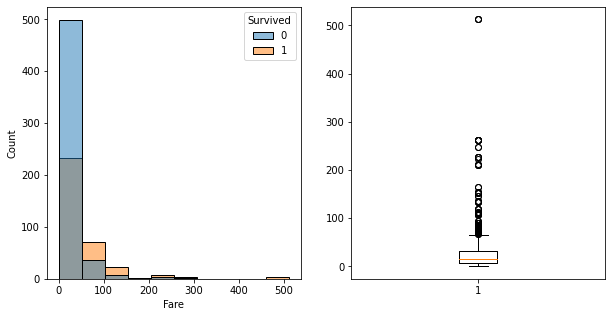

In [38]:
plt.figure(figsize = (10, 5))
plt.subplot(121)
sns.histplot(x = 'Fare', hue = 'Survived', data = train, bins=10)
plt.subplot(122)
plt.boxplot(train['Fare'])

**test의 결측값 채우기**


In [39]:
test['Fare'][test['Fare'].isnull()]  = round(train[train['Embarked']=='S']['Fare'].mean(), 3)

#### 4. Cabin

- 알파벳 + 숫자로 구성되어 있다.
- Cabin이 여러개 들어있는 경우도 있다.  

→ Cabin은 데이터의 대부분이 결측값이므로 열을 삭제한다.

In [40]:
train.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)

#### 5. Embarked

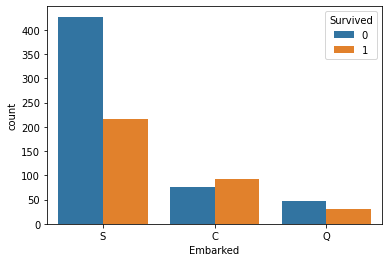

In [41]:
sns.countplot(x = 'Embarked', data = train , hue = 'Survived')

**결측값 채우기**

In [42]:
train[(train['Fare']>=79.5)&(train['Fare']<=82)].sort_values(['Fare'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,NameTitle,Age_Dist,Family,Ticket_word,Ticket_num
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,S,Mr.,5,2,,110413
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,S,Mrs.,4,2,,110413
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,S,Miss.,2,2,,110413
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,NaN,Miss.,4,0,,113572
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,NaN,Mrs.,5,0,,113572
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,S,Master.,0,2,,33638


→ 인접한 요금(Fare)들의 Embarked가 'S'이므로 'S'로 채움

In [43]:
# 결측값 채우기
train['Embarked'][train['Embarked'].isnull()] = 'S'

## 데이터 처리

In [44]:
X = pd.concat([train, test], axis = 0)

### Labeling

In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for t in ['Sex', 'Embarked', 'NameTitle', 'Ticket_word']:
  X[t] = le.fit_transform(X[t])

In [46]:
train = X[X['Survived'].notnull()]
test = X[X['Survived'].isnull()]

### Train-Test Split

In [47]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'NameTitle', 'Age_Dist',
       'Family', 'Ticket_word', 'Ticket_num'],
      dtype='object')

In [48]:
X = train.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Ticket_num'], axis = 1)
y = train['Survived']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
print('X_train : {} / X_test : {}\ny_train : {} / y_test : {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train : (623, 9) / X_test : (268, 9)
y_train : (623,) / y_test : (268,)


## Modeling

### 1. Logistic Regression

In [51]:
import statsmodels.api as sm

logit = sm.Logit(y_train, X_train)
result = logit.fit()

# 분석결과
result.summary()

Optimization terminated successfully.
         Current function value: 0.490736
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.2558
Time:                        05:56:09   Log-Likelihood:                -305.73
converged:                       True   LL-Null:                       -410.79
Covariance Type:            nonrobust   LLR p-value:                 4.690e-41
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Pclass         -0.2402      0.126     -1.905      0.057      -0.487       0.007
Sex            -2.2863      0.219    -10.418      0.000      -2.716      -1.856
Age             0.0259      0.028      0.934      0.350      -0.028       0.080
Fare            0.0106      0.003      3.097      0.002       0.004       0.017
Embarked       -0.1123      0.130     -0.863      0.388      -0.367       0.143
NameTitle       0.4950      0.131      3.778      0.000       0.238       0.752
Age_Dist       -0.4975      0.320     -1.556      0.120      -1.124       0.129
Family         -0.1879      0.099     -1.902      0.057      -0.382       0.006
Ticket_word     0.0146      0.010      1.416      0.157      -0.006       0.035
===============================================================================
"""

In [52]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

print('정확도 : {}'.format(lg.score(X_train, y_train)))

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(lg.predict(X_test), y_test))
print(classification_report(lg.predict(X_test), y_test))

정확도 : 0.7961476725521669
[[135  33]
 [ 22  78]]
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       168
         1.0       0.70      0.78      0.74       100

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268



### 2. KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10, 
                           weights = 'distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('정확도 : %.2f'%(accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

정확도 : 0.71
[[132  54]
 [ 25  57]]
              precision    recall  f1-score   support

         0.0       0.84      0.71      0.77       186
         1.0       0.51      0.70      0.59        82

    accuracy                           0.71       268
   macro avg       0.68      0.70      0.68       268
weighted avg       0.74      0.71      0.71       268



### 3. RandomForest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('정확도 : %.2f'%(accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

정확도 : 0.81
[[143  37]
 [ 14  74]]
              precision    recall  f1-score   support

         0.0       0.91      0.79      0.85       180
         1.0       0.67      0.84      0.74        88

    accuracy                           0.81       268
   macro avg       0.79      0.82      0.80       268
weighted avg       0.83      0.81      0.81       268



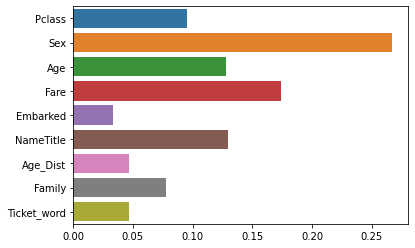

In [55]:
sns.barplot(rf.feature_importances_, X_train.columns)

### 4. XGBoost

In [56]:
from xgboost import XGBClassifier, plot_importance, to_graphviz

xgb = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.01, colsample_bytree=0.8, colsample_bylevel=0.6, gamma=1, reg_alpha=1)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('정확도 : %.2f'%(accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

정확도 : 0.82
[[144  35]
 [ 13  76]]
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86       179
         1.0       0.68      0.85      0.76        89

    accuracy                           0.82       268
   macro avg       0.80      0.83      0.81       268
weighted avg       0.84      0.82      0.82       268



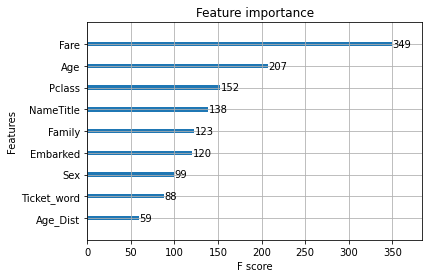

In [57]:
plot_importance(xgb)

### 5. LGBM

In [58]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, colsample_bytree=0.6, min_child_weight=0.6, gamma=10, reg_alpha=3)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print('정확도 : %.2f'%(accuracy_score(y_pred, y_test)))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

정확도 : 0.82
[[142  32]
 [ 15  79]]
              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       174
         1.0       0.71      0.84      0.77        94

    accuracy                           0.82       268
   macro avg       0.81      0.83      0.81       268
weighted avg       0.84      0.82      0.83       268



<BarContainer object of 9 artists>

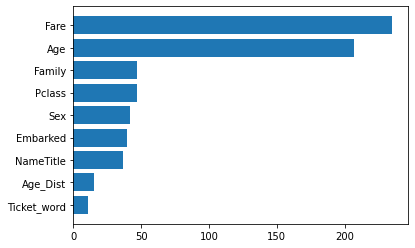

In [59]:
fi = pd.DataFrame({'col':X_train.columns, 'importance':lgbm.feature_importances_})
fi.sort_values(['importance'], inplace = True)
plt.barh(fi['col'], fi['importance'])

## Test 예측하기

In [60]:
xgb = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.01, colsample_bytree=0.8, colsample_bylevel=0.6, gamma=1, reg_alpha=1)

xgb.fit(X, y)
test['Survived'] = xgb.predict(test.drop(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 
                                          'Ticket', 'Ticket_num'], axis = 1))

In [61]:
test['Survived'] = test['Survived'].astype('int')
test[['PassengerId', 'Survived']].to_csv('submission.csv', index = False)

제출 예시

In [62]:
pd.read_csv('submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
